## Titanic problem

0. Import path

In [1]:
# import os as os
import pandas as pd
import numpy as np
# import math
# import random

# from datetime import datetime
# from tqdm.notebook import tqdm 
# from scipy.stats import binom
import matplotlib.pyplot as plt

1) load data

In [2]:
data_train = pd.read_csv('data/train.csv')

data_test = pd.read_csv('data/test.csv')

gender_submission = pd.read_csv('data/gender_submission.csv')


In [3]:
display(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
pd.DataFrame(data_train.Survived.value_counts())

,Survived
0,549
1,342


In [6]:
pd.DataFrame(data_train.Survived.value_counts(normalize=True))

,Survived
0,0.616162
1,0.383838


In [7]:
data_test.PassengerId
# data_test['Survived'] =  np.repeat(0,418)
data_test['Survived'] =  0

In [8]:
data_test.shape

(418, 12)

In [9]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [10]:
diccionario = {'PassengerId' : data_test['PassengerId'], 'Survived' : data_test['Survived']}

In [11]:
submit = pd.DataFrame(diccionario)
submit.to_csv('data/theyallperish_1.csv', index=False)

2) MUJERES

In [12]:
data_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
pd.crosstab(data_train['Sex'], data_train['Survived'], normalize='all')

Survived,0,1
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


In [14]:
test = pd.DataFrame(data_test)

test['Survived'] = 0

test.loc[test['Sex'] == 'female', 'Survived'] = 1

display(test)
        

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [15]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : test['Survived']}
submit = pd.DataFrame(diccionario)
submit.to_csv('data/theyallperish_2.csv', index=False)

3) Edad

In [16]:
data_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
train = data_train
train['Child'] = 0
train.loc[train['Age'] < 18, 'Child'] = 1

In [18]:
train.Child.fillna(1)

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Child, Length: 891, dtype: int64

In [19]:
train = train[['Survived', 'Child', 'Sex']]

In [20]:
result = train.groupby(['Child', 'Sex']).agg({'Survived':'sum'}).reset_index()
result

,Child,Sex,Survived
0,0,female,195
1,0,male,86
2,1,female,38
3,1,male,23


In [21]:
result = train.groupby(['Child', 'Sex']).agg({'Survived':'count'}).reset_index()
result

,Child,Sex,Survived
0,0,female,259
1,0,male,519
2,1,female,55
3,1,male,58


In [22]:
result = train.groupby(['Child', 'Sex']).agg({'Survived': lambda x: sum(x)/len(x)}).reset_index()
result

,Child,Sex,Survived
0,0,female,0.752896
1,0,male,0.165703
2,1,female,0.690909
3,1,male,0.396552


Aun considerando los casos de mayor o menor de edad, el género termina condicionando el resultado. 

4) Clase

In [23]:
train_clase = data_train

train_clase['Fare2'] = '30+'

train_clase.loc[(train_clase['Fare'] < 30) & (train_clase['Fare'] > 20), 'Fare2'] = '20-30' 
train_clase.loc[(train_clase['Fare'] < 20) & (train_clase['Fare'] > 10), 'Fare2'] = '10-20'
train_clase.loc[(train_clase['Fare'] < 10), 'Fare2'] = '10'

In [24]:
train_clase.groupby(['Fare2', 'Pclass', 'Sex'])['Survived'].mean().reset_index()


,Fare2,Pclass,Sex,Survived
0,10,1,male,0.000000
1,10,2,male,0.000000
2,10,3,female,0.593750
3,10,3,male,0.111538
4,10-20,2,female,0.914286
5,10-20,2,male,0.158730
6,10-20,3,female,0.581395
7,10-20,3,male,0.236842
8,20-30,1,female,0.833333
9,20-30,1,male,0.400000


In [25]:
test_clase = data_test
test_clase['Survived'] = 0
test_clase.loc[test_clase['Sex'] == 'female', 'Survived'] = 1
test_clase.loc[(test_clase['Sex'] == 'female') & (test_clase['Pclass'] == 3) & (test_clase['Fare'] >= 20), 'Survived'] = 0
test_clase

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [26]:
diccionario = {'PassengerId' : test_clase['PassengerId'], 'Survived' : test_clase['Survived']}
submit = pd.DataFrame(diccionario)
submit.to_csv('data/theyallperish_4.csv', index=False)

## Decision Trees

In [27]:
from sklearn import tree

In [28]:
model = tree.DecisionTreeClassifier()

In [29]:
data_train_sn = data_train[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].dropna()
X_train_sn = data_train_sn[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']].replace({'male' : 0, 'female' : 1})
y_train_sn = data_train_sn.Survived

data_test_sn = data_test.dropna()
X_test_sn = data_test_sn[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']].replace({'male' : 0, 'female' : 1})


In [30]:
X_train = data_train[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']].replace({'male' : 0, 'female' : 1})
mean_age = X_train.Age.mean()
mean_fare = X_train.Fare.mean()
X_train['Age'] = X_train['Age'].fillna(mean_age)
# X_train.isna().sum()
y_train = data_train.Survived

X_test = data_test[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']].replace({'male' : 0, 'female' : 1})
X_test['Age'] = X_test.Age.fillna(mean_age)
X_test['Fare'] = X_test.Age.fillna(mean_fare)


In [31]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
tree_prediction = model.predict(X_test)

In [33]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : tree_prediction}
submit = pd.DataFrame(diccionario)
submit.to_csv('data/tree_prediction.csv', index=False)

In [34]:
## otra forma 
model = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=20, min_samples_leaf=7)

In [35]:
Embarked_train = pd.get_dummies(data_train['Embarked'])

X_train = data_train[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']].replace({'male' : 0, 
                                                                        'female' : 1})
X_train = pd.concat([X_train, Embarked_train], axis=1)


In [36]:
mean_age = X_train.Age.mean()
mean_fare = X_train.Fare.mean()

X_train['Age'] = X_train['Age'].fillna(mean_age)
y_train = data_train.Survived

In [37]:
Embarked_test = pd.get_dummies(data_test['Embarked'])

X_test = data_test[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']].replace({'male' : 0, 
                                                                      'female' : 1})

X_test = pd.concat([X_test, Embarked_test], axis=1)

In [38]:
X_test['Age'] = X_test.Age.fillna(mean_age)
X_test['Fare'] = X_test.Age.fillna(mean_fare)

model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=7, min_samples_split=20)

In [39]:
tree_prediction = model.predict(X_test)

In [40]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : tree_prediction}
submit = pd.DataFrame(diccionario)
submit.to_csv('data/tree_prediction_2.csv', index=False)

### Feature Engineering

In [41]:
test_fe = data_test
train_fe = data_train

In [42]:
train_fe['Name'][0]

'Braund, Mr. Owen Harris'

In [43]:
train_fe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Child', 'Fare2'],
      dtype='object')

In [44]:
string_to_split = train_fe['Name'][0]
delimiter = ","
string_to_split.split(delimiter)


['Braund', ' Mr. Owen Harris']

In [45]:
'eef geg'.split()

['eef', 'geg']

In [46]:
test_fe['Survived'] =float('nan')

combi = pd.concat([train_fe, test_fe], ignore_index=True)

In [47]:
combi.Name[0]

'Braund, Mr. Owen Harris'

In [48]:
combi['Name'][0].split(',')


['Braund', ' Mr. Owen Harris']

In [49]:
combi['Name'][0].split('[,.]')

['Braund, Mr. Owen Harris']

In [50]:
import re
result = re.split('[,.]', combi['Name'][0])
result = [s.strip() for s in result]
result

['Braund', 'Mr', 'Owen Harris']

In [51]:
re.split('[,.]', combi['Name'][0])[1]

' Mr'

In [52]:
combi['Title'] = combi['Name'].apply(lambda x: re.split('[,.]', x)[1].strip() if pd.notnull(x) else None)

In [53]:
combi['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [54]:
'a' if 2 == 2 else 'b'

'a'

In [55]:
f = lambda x: re.split('[,.]', x)[1].strip() if pd.notnull(x) else None
f

<function __main__.<lambda>(x)>

In [56]:
def g(x):
    return re.split('[,.]', x)[1].strip() if pd.notnull(x) else None
g

<function __main__.g(x)>

In [57]:
combi['Title'] = combi['Title'].str.replace(' ', '')

In [58]:
combi['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [59]:
title_counts = combi['Title'].value_counts()
title_counts

Mr             757
Miss           260
Mrs            197
Master          61
Rev              8
Dr               8
Col              4
Mlle             2
Major            2
Ms               2
Lady             1
Sir              1
Mme              1
Don              1
Capt             1
theCountess      1
Jonkheer         1
Dona             1
Name: Title, dtype: int64

In [60]:
combi['Title'].replace(['Mme', 'Mlle'], 'Mlle', inplace=True)

In [61]:
combi['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir', inplace=True)
combi['Title'].replace(['Dona', 'Lady', 'the Countess', 'Jonkheer'], 'Lady', inplace=True)

In [62]:
combi['FamilySize'] = combi['SibSp'] + combi['Parch'] + 1


In [63]:
combi['Parch']

0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    1
Name: Parch, Length: 1309, dtype: int64

In [64]:
combi['FamilySize'] 

0       2
1       2
2       1
3       2
4       1
       ..
1304    1
1305    1
1306    1
1307    1
1308    3
Name: FamilySize, Length: 1309, dtype: int64

In [65]:
combi['Surname'] = combi['Name'].str.split('[,.]').str[0]

In [66]:
combi['FamilyID'] = combi['FamilySize'].astype(str) + combi['Surname']

In [67]:
combi['FamilyID'] 

0              2Braund
1             2Cumings
2           1Heikkinen
3            2Futrelle
4               1Allen
             ...      
1304          1Spector
1305    1Oliva y Ocana
1306          1Saether
1307             1Ware
1308            3Peter
Name: FamilyID, Length: 1309, dtype: object

In [68]:
combi.loc[combi['FamilySize'] <= 2, 'FamilyID'] = 'Small'

In [69]:
title_counts = combi['FamilyID'].value_counts()
title_counts

Small             1025
11Sage              11
7Andersson           9
8Goodwin             8
7Asplund             7
                  ... 
4Jacobsohn           1
3Strom               1
3Appleton            1
3Silven              1
5Kink-Heilmann       1
Name: FamilyID, Length: 97, dtype: int64

In [70]:
famIDs = pd.DataFrame(combi['FamilyID'].value_counts()).reset_index()
famIDs.columns = ['FamilyID', 'Count']

In [71]:
famIDs

,FamilyID,Count
0,Small,1025
1,11Sage,11
2,7Andersson,9
3,8Goodwin,8
4,7Asplund,7
...,...,...
92,4Jacobsohn,1
93,3Strom,1
94,3Appleton,1
95,3Silven,1


In [72]:
famIDs = famIDs[famIDs['Count'] <= 2]

In [73]:
combi.loc[combi['FamilyID'].isin(famIDs['FamilyID']), 'FamilyID'] = 'Small'
combi['FamilyID'] = combi['FamilyID'].astype('category')

In [74]:
train_fe = combi.iloc[:891, :]
test_fe = combi.iloc[891:1309, :]

In [75]:
model = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=20, min_samples_leaf=7)

In [76]:
Embarked_train = pd.get_dummies(train_fe['Embarked'])

X_train = train_fe[['Pclass', 'Sex', 'Age', 'SibSp', 
                    'Parch', 'Fare', 'Embarked', 'Title', 
                    'FamilySize']].replace({'male' : 0, 'female' : 1, 
                                            'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Sir': 5,
                                            'Rev': 6, 'Dr': 7, 'Mlle': 8, 'Ms': 9, 'Lady': 10,
                                            'Col': 11, 'theCountess': 12})

mean_age = X_train.Age.mean()
mean_fare = X_train.Fare.mean()

X_train = pd.concat([X_train, Embarked_train], axis=1)
X_train = X_train.drop('Embarked', axis=1)
X_train['Age'] = X_train['Age'].fillna(mean_age)
# X_train.isna().sum()
y_train = train_fe.Survived


#################
Embarked_test = pd.get_dummies(test_fe['Embarked'])

X_test = test_fe[['Pclass', 'Sex', 'Age', 'SibSp', 
                  'Parch', 'Fare', 'Embarked', 'Title', 
                  'FamilySize']].replace({'male' : 0, 'female' : 1,
                                          'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Sir': 5,
                                          'Rev': 6, 'Dr': 7, 'Mlle': 8, 'Ms': 9, 'Lady': 10,
                                          'Col': 11, 'theCountess': 12})

X_test = pd.concat([X_test, Embarked_test], axis=1)
X_test = X_test.drop('Embarked', axis=1)
X_test['Age'] = X_test.Age.fillna(mean_age)
X_test['Fare'] = X_test.Age.fillna(mean_fare)

model.fit(X_train, y_train)
tree_prediction = model.predict(X_test)

In [77]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : tree_prediction}
submit = pd.DataFrame(diccionario)
submit.Survived = submit.Survived.astype('int')
submit.to_csv('data/tree_prediction_feature_engineering.csv', index=False)

In [78]:
submit.Survived = submit.Survived.astype('int')

In [79]:
submit.to_csv('data/tree_prediction_feature_engineering_op.csv', index=False)

In [80]:
pd.read_csv('data/tree_prediction.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,0
415,1307,0
416,1308,1


In [81]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : test['Survived']}
submit = pd.DataFrame(diccionario)
submit.to_csv('data/theyallperish.csv', index=False)

### Random Forests

In [82]:
test_rf = data_test
train_rf = data_train

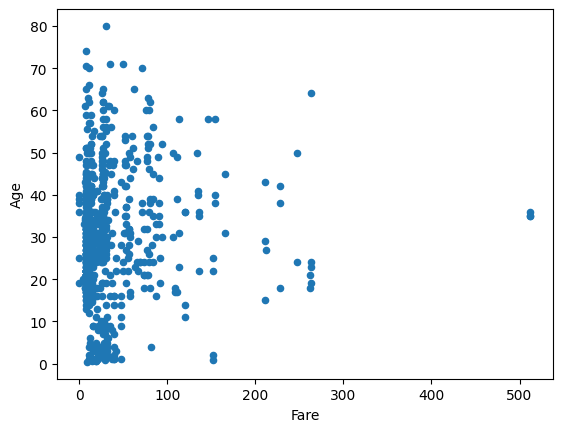

In [83]:
train_rf.plot(x='Fare', y='Age', kind='scatter')
plt.show()

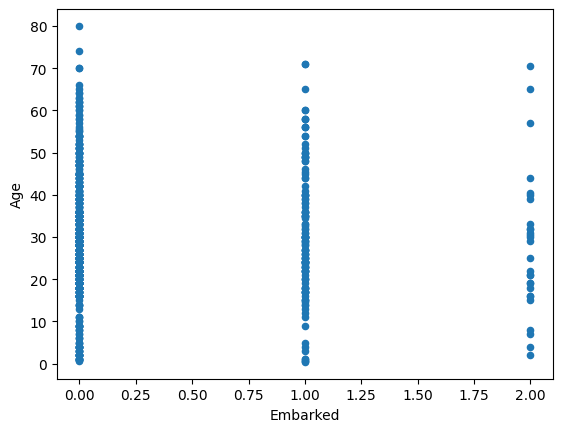

In [84]:
train_rf.replace({'S' : 0, 'C' : 1, 'Q' : 2}).plot(x='Embarked', y='Age', kind='scatter')
plt.show()

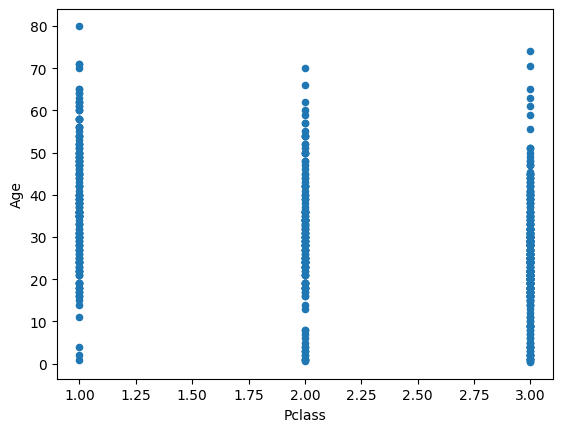

In [85]:
train_rf.plot(x='Pclass', y='Age', kind='scatter')
plt.show()

In [86]:
combi_rf = pd.concat([train_rf, test_rf], ignore_index=True)

In [87]:
combi_rf['Embarked'] = combi_rf['Embarked'].fillna('S')

In [88]:
fare_median = combi_rf['Fare'].median()

In [89]:
combi_rf['Fare'] = combi_rf['Fare'].fillna(fare_median)

In [90]:
age_mean = combi_rf['Age'].mean()

In [91]:
combi_rf['Age'] = combi_rf['Age'].fillna(age_mean)

In [92]:
combi_rf.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Child           418
Fare2           418
dtype: int64

In [93]:
['Survived', 'Age', 'Fare', ' Cabin', 'Embarked', 'Child', 'Fare2']

['Survived', 'Age', 'Fare', ' Cabin', 'Embarked', 'Child', 'Fare2']

In [94]:
combi_rf['Sex'] = combi_rf[['Sex']].replace({'male' : 0, 'female': 1})
Embarked_rf = pd.get_dummies(combi_rf['Embarked'])

In [95]:
combi_rf = pd.DataFrame.join(combi_rf, Embarked_rf)

In [96]:
combi_rf_train = combi_rf.iloc[:891]
combi_rf_test = combi_rf.iloc[891:]

In [97]:
combi_rf_train = combi_rf_train[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S']]

In [98]:
combi_rf_test = combi_rf_test[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S']]

In [99]:
combi_rf_y = combi_rf['Survived'].iloc[: 891]

In [100]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)

clf.fit(combi_rf_train, combi_rf_y)

result = clf.predict(combi_rf_test)

In [101]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : result}
submit = pd.DataFrame(diccionario)
submit.Survived = submit.Survived.astype('int')
submit.to_csv('data/randomforest_01_estimator20.csv', index=False)

### Intento 2 - PClass

In [102]:
combi_rf = pd.concat([train_rf, test_rf], ignore_index=True)
combi_rf['Embarked'] = combi_rf['Embarked'].fillna('S')
fare_median = combi_rf['Fare'].median()
combi_rf['Fare'] = combi_rf['Fare'].fillna(fare_median)

In [103]:
combi_rf['Age'] = combi_rf['Age'].fillna(combi_rf.groupby(['Pclass']).Age.transform('mean'))

In [104]:
combi_rf['Sex'] = combi_rf[['Sex']].replace({'male' : 0, 'female': 1})
Embarked_rf = pd.get_dummies(combi_rf['Embarked'])

In [105]:
combi_rf = pd.DataFrame.join(combi_rf, Embarked_rf)
combi_rf_train = combi_rf.iloc[:891]
combi_rf_test = combi_rf.iloc[891:]

combi_rf_train = combi_rf_train[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S']]

combi_rf_test = combi_rf_test[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S']]

combi_rf_y = combi_rf['Survived'].iloc[: 891]

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(combi_rf_train, combi_rf_y)

result = clf.predict(combi_rf_test)

In [106]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : result}
submit = pd.DataFrame(diccionario)
submit.Survived = submit.Survived.astype('int')
submit.to_csv('data/randomforest_02_Pclass.csv', index=False)

#### Intento 3 - Embarked

In [107]:
combi_rf = pd.concat([train_rf, test_rf], ignore_index=True)
combi_rf['Embarked'] = combi_rf['Embarked'].fillna('S')
fare_median = combi_rf['Fare'].median()
combi_rf['Fare'] = combi_rf['Fare'].fillna(fare_median)

In [108]:
combi_rf['Age'] = combi_rf['Age'].fillna(combi_rf.groupby(['Embarked']).Age.transform('mean'))

In [109]:
combi_rf['Sex'] = combi_rf[['Sex']].replace({'male' : 0, 'female': 1})
Embarked_rf = pd.get_dummies(combi_rf['Embarked'])

In [110]:
combi_rf = pd.DataFrame.join(combi_rf, Embarked_rf)
combi_rf_train = combi_rf.iloc[:891]
combi_rf_test = combi_rf.iloc[891:]

combi_rf_train = combi_rf_train[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S']]

combi_rf_test = combi_rf_test[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S']]

combi_rf_y = combi_rf['Survived'].iloc[: 891]

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(combi_rf_train, combi_rf_y)

result = clf.predict(combi_rf_test)

In [111]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : result}
submit = pd.DataFrame(diccionario)
submit.Survived = submit.Survived.astype('int')
submit.to_csv('data/randomforest_03__Embarked.csv', index=False)

#### Intento 4 - random forest para obtener el Age


In [112]:
combi_rf = pd.concat([train_rf, test_rf], ignore_index=True)
combi_rf['Embarked'] = combi_rf['Embarked'].fillna('S')
fare_median = combi_rf['Fare'].median()
combi_rf['Fare'] = combi_rf['Fare'].fillna(fare_median)

In [113]:
combi_rf['Sex'] = combi_rf[['Sex']].replace({'male' : 0, 'female': 1})
Embarked_rf = pd.get_dummies(combi_rf['Embarked'])

In [114]:
combi_rf = pd.DataFrame.join(combi_rf, Embarked_rf)

In [115]:
train_Age_rf = combi_rf.dropna()

# test_Age_rf = combi_rf.loc[combi_rf['Age'].isna()]

In [116]:
train_Age_rf_X = train_Age_rf[['PassengerId', 
                               'Pclass',  
                               'Sex', 
                               'SibSp',
                               'Parch',  
                               'Fare', 
                               'C',
                               'Q', 
                               'S']]

train_Age_rf_y = train_Age_rf['Age']

test_Age_rf_X = combi_rf[['PassengerId', 
                             'Pclass',  
                             'Sex', 
                             'SibSp',
                             'Parch',  
                             'Fare', 
                             'C',
                             'Q', 
                             'S']]

In [117]:
from sklearn.ensemble import RandomForestRegressor

clr = RandomForestRegressor()

clr.fit(train_Age_rf_X, train_Age_rf_y)

result = clr.predict(test_Age_rf_X)

In [118]:
combi_rf['Age'] = combi_rf['Age'].fillna(pd.Series(result))

In [119]:
combi_rf_train = combi_rf.iloc[:891]
combi_rf_test = combi_rf.iloc[891:]

combi_rf_train = combi_rf_train[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S']]

combi_rf_test = combi_rf_test[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S']]

combi_rf_y = combi_rf['Survived'].iloc[: 891]

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(combi_rf_train, combi_rf_y)

result = clf.predict(combi_rf_test)

In [120]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : result}
submit = pd.DataFrame(diccionario)
submit.Survived = submit.Survived.astype('int')
submit.to_csv('data/randomforest_04_Agepredict.csv', index=False)

#### Intento 5 - Random forest con parámetros

In [121]:
combi_rf = pd.concat([train_rf, test_rf], ignore_index=True)
combi_rf.columns

combi_rf['Embarked'] = combi_rf['Embarked'].fillna('S')

fare_median = combi_rf['Fare'].median()
combi_rf['Fare'] = combi_rf['Fare'].fillna(fare_median)

age_mean = combi_rf['Age'].mean()
combi_rf['Age'] = combi_rf['Age'].fillna(age_mean)

combi_rf['Sex'] = combi_rf[['Sex']].replace({'male' : 0, 'female': 1})

Embarked_rf = pd.get_dummies(combi_rf['Embarked'])
combi_rf = pd.DataFrame.join(combi_rf, Embarked_rf)

# combi_rf.isna().sum()

combi_rf_train_X = combi_rf[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S']].iloc[:891]

combi_rf_test = combi_rf[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S']].iloc[891:]

combi_rf_train_y = combi_rf['Survived'].iloc[: 891]


In [122]:
clf = RandomForestClassifier(n_estimators = 20 , ## queda fijo en 20 - default = 10
                             max_features = 'auto' , ## default = 'auto'>'log2'>'sqrt'>None
                             max_depth = None, ## default = None > 10 = 20 > 3
                             min_samples_split = 2, ## default = 2 > 5
                             min_samples_leaf = 1, ## default = 1 > 5
                             max_leaf_nodes = None, ## default None > 3
                             random_state = None ## default None
                             )

clf.fit(combi_rf_train_X, combi_rf_train_y)

result = clf.predict(combi_rf_test)

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [123]:
## ---> feature engineering  (titulo, grupo familiar)

In [124]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : result}
submit = pd.DataFrame(diccionario)
submit.Survived = submit.Survived.astype('int')
submit.to_csv('data/randomforest_05_RF_parameters_nodes3.csv', index=False)

#### Intento 6 - agregar feacture

In [125]:
test_rf = data_test
train_rf = data_train
combi_rf = pd.concat([train_rf, test_rf], ignore_index=True)

In [126]:
combi_rf['Embarked'] = combi_rf['Embarked'].fillna('S')

fare_median = combi_rf['Fare'].median()
combi_rf['Fare'] = combi_rf['Fare'].fillna(fare_median)

# age_mean = combi_rf['Age'].mean()
# combi_rf['Age'] = combi_rf['Age'].fillna(age_mean)

combi_rf['Sex'] = combi_rf[['Sex']].replace({'male' : 0, 'female': 1})

Embarked_rf = pd.get_dummies(combi_rf['Embarked'])
combi_rf = pd.DataFrame.join(combi_rf, Embarked_rf)

# combi_rf.isna().sum()


In [127]:
string_to_split = combi_rf['Name'][0]
delimiter = ","
string_to_split.split(delimiter)


combi_rf['Title'] = combi_rf['Name'].apply(lambda x: re.split('[,.]', x)[1].strip() if pd.notnull(x) else None)

f = lambda x: re.split('[,.]', x)[1].strip() if pd.notnull(x) else None



def g(x):
    return re.split('[,.]', x)[1].strip() if pd.notnull(x) else None



combi_rf['Title'] = combi_rf['Title'].str.replace(' ', '')


title_counts = combi_rf['Title'].value_counts()
title_counts

combi_rf['Title'].replace(['Mme', 'Mlle'], 'Mlle', inplace=True)

combi_rf['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir', inplace=True)
combi_rf['Title'].replace(['Dona', 'Lady', 'the Countess', 'Jonkheer'], 'Lady', inplace=True)


In [128]:

combi_rf['FamilySize'] = combi_rf['SibSp'] + combi_rf['Parch'] + 1

combi_rf['Surname'] = combi_rf['Name'].str.split('[,.]').str[0]

combi_rf['FamilyID'] = combi_rf['FamilySize'].astype(str) + combi_rf['Surname']

combi_rf.loc[combi_rf['FamilySize'] <= 2, 'FamilyID'] = 'Small'

title_counts = combi_rf['FamilyID'].value_counts()
title_counts

famIDs = pd.DataFrame(combi_rf['FamilyID'].value_counts()).reset_index()
famIDs.columns = ['FamilyID', 'Count']

famIDs = famIDs[famIDs['Count'] <= 2]

combi_rf.loc[combi_rf['FamilyID'].isin(famIDs['FamilyID']), 'FamilyID'] = 'Small'
combi_rf['FamilyID'] = combi_rf['FamilyID'].astype('category')


In [129]:
combi_rf = combi_rf[['PassengerId',
                     'Pclass', 
                     'Sex', 
                     'Age', 
                     'SibSp',
                     'Parch', 
                     'Fare', 
                     'C', 
                     'Q',
                     'S',
                     'Title',
                     'FamilySize',
                     'Survived',
                     ]].replace({'Mr': 1, 
                                 'Mrs': 2, 
                                 'Miss': 3, 
                                 'Master': 4, 
                                 'Sir': 5,
                                 'Rev': 6, 
                                 'Dr': 7, 
                                 'Mlle': 8, 
                                 'Ms': 9, 
                                 'Lady': 10,
                                 'Col': 11, 
                                 'theCountess': 12
                                  })


In [130]:
train_Age_rf = combi_rf.dropna()

In [131]:
train_Age_rf_X = train_Age_rf[['PassengerId',
                                'Pclass', 
                                'Sex', 
                                'SibSp',
                                'Parch', 
                                'Fare', 
                                'C', 
                                'Q',
                                'S',
                                'Title',
                                'FamilySize']]

train_Age_rf_y = train_Age_rf['Age']

test_Age_rf_X = combi_rf[['PassengerId',
                          'Pclass', 
                          'Sex', 
                          'SibSp',
                          'Parch', 
                          'Fare', 
                          'C', 
                          'Q',
                          'S',
                          'Title',
                          'FamilySize']]

In [132]:
from sklearn.ensemble import RandomForestRegressor

clr = RandomForestRegressor()

clr.fit(train_Age_rf_X, train_Age_rf_y)

result = clr.predict(test_Age_rf_X)

In [133]:
combi_rf['Age'] = combi_rf['Age'].fillna(pd.Series(result))

In [134]:
combi_rf_train_X = combi_rf[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S',
                                 'Title',
                                 'FamilySize']].iloc[:891]

combi_rf_test = combi_rf[['PassengerId',
                                 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S',
                                 'Title',
                                 'FamilySize']].iloc[891:]

combi_rf_train_y = combi_rf['Survived'].iloc[: 891]

In [135]:
clf = RandomForestClassifier(n_estimators = 20)

clf.fit(combi_rf_train_X, combi_rf_train_y)

result = clf.predict(combi_rf_test)

In [136]:
diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : result}
submit = pd.DataFrame(diccionario)
submit.Survived = submit.Survived.astype('int')
submit.to_csv('data/randomforest_05_RF_masparameters_Agepregressor.csv', index=False)

### Modificar parameters nuevamente

In [137]:
####################
### COMBI

test_rf = data_test
train_rf = data_train
combi_rf = pd.concat([train_rf, test_rf], ignore_index=True)



In [138]:
####################
### DELETE NAN

combi_rf['Embarked'] = combi_rf['Embarked'].fillna('S')

fare_median = combi_rf['Fare'].median()
combi_rf['Fare'] = combi_rf['Fare'].fillna(fare_median)

# age_mean = combi_rf['Age'].mean()
# combi_rf['Age'] = combi_rf['Age'].fillna(age_mean)

combi_rf['Sex'] = combi_rf[['Sex']].replace({'male' : 0, 'female': 1})

Embarked_rf = pd.get_dummies(combi_rf['Embarked'])
combi_rf = pd.DataFrame.join(combi_rf, Embarked_rf)

# combi_rf.isna().sum()


In [139]:
####################
### TITLE

string_to_split = combi_rf['Name'][0]
delimiter = ","
string_to_split.split(delimiter)


combi_rf['Title'] = combi_rf['Name'].apply(lambda x: re.split('[,.]', x)[1].strip() if pd.notnull(x) else None)

f = lambda x: re.split('[,.]', x)[1].strip() if pd.notnull(x) else None


def g(x):
    return re.split('[,.]', x)[1].strip() if pd.notnull(x) else None

combi_rf['Title'] = combi_rf['Title'].str.replace(' ', '')


title_counts = combi_rf['Title'].value_counts()
title_counts

combi_rf['Title'].replace(['Mme', 'Mlle'], 'Mlle', inplace=True)

combi_rf['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir', inplace=True)
combi_rf['Title'].replace(['Dona', 'Lady', 'the Countess', 'Jonkheer'], 'Lady', inplace=True)


In [140]:
title_rf = pd.get_dummies(combi_rf['Title'])
combi_rf = pd.DataFrame.join(combi_rf, title_rf)


In [141]:
####################
### FAMILY SIZE
combi_rf['FamilySize'] = combi_rf['SibSp'] + combi_rf['Parch'] + 1

combi_rf['Surname'] = combi_rf['Name'].str.split('[,.]').str[0]

combi_rf['FamilyID'] = combi_rf['FamilySize'].astype(str) + combi_rf['Surname']

combi_rf.loc[combi_rf['FamilySize'] <= 2, 'FamilyID'] = 'Small'

title_counts = combi_rf['FamilyID'].value_counts()
title_counts

famIDs = pd.DataFrame(combi_rf['FamilyID'].value_counts()).reset_index()
famIDs.columns = ['FamilyID', 'Count']

famIDs = famIDs[famIDs['Count'] <= 2]

combi_rf.loc[combi_rf['FamilyID'].isin(famIDs['FamilyID']), 'FamilyID'] = 'Small'
combi_rf['FamilyID'] = combi_rf['FamilyID'].astype('category')

combi_rf = combi_rf[['PassengerId',
                     'Pclass', 
                     'Sex', 
                     'Age', 
                     'SibSp',
                     'Parch', 
                     'Fare', 
                     'C', 
                     'Q',
                     'S',
                     'Title',
                     'FamilySize',
                     'Col', 'Dr', 'Lady', 'Master', 'Miss', 'Mlle', 'Mr',
                     'Mrs', 'Ms', 'Rev', 'Sir', 'theCountess',
                     'Survived'
                     ]]

In [142]:
####################
### AGE - REGRESSOR
train_Age_rf = combi_rf.dropna()

train_Age_rf_X = train_Age_rf[['PassengerId',
                                'Pclass', 
                                'Sex', 
                                'SibSp',
                                'Parch', 
                                'Fare', 
                                'C', 
                                'Q',
                                'S',
                              #   'Title',
                                'FamilySize',  'Col', 'Dr', 'Lady', 'Master', 'Miss', 'Mlle', 'Mr',
                     'Mrs', 'Ms', 'Rev', 'Sir', 'theCountess',]]

train_Age_rf_y = train_Age_rf['Age']

test_Age_rf_X = combi_rf[['PassengerId',
                          'Pclass', 
                          'Sex', 
                          'SibSp',
                          'Parch', 
                          'Fare', 
                          'C', 
                          'Q',
                          'S',
                         #  'Title',
                          'FamilySize',  'Col', 'Dr', 'Lady', 'Master', 'Miss', 'Mlle', 'Mr',
                     'Mrs', 'Ms', 'Rev', 'Sir', 'theCountess',]]

from sklearn.ensemble import RandomForestRegressor

clr = RandomForestRegressor()

clr.fit(train_Age_rf_X, train_Age_rf_y)

result = clr.predict(test_Age_rf_X)

combi_rf['Age'] = combi_rf['Age'].fillna(pd.Series(result))

In [143]:
####################
### RANDOM FORESTS
columns_to_keep = [ 'Pclass', 
                                 'Sex', 
                                 'Age', 
                                 'SibSp',
                                 'Parch', 
                                 'Fare', 
                                 'C', 
                                 'Q',
                                 'S',
                                 'FamilySize',   'Col', 'Dr', 'Lady', 'Master', 'Miss', 'Mlle', 'Mr',
                     'Mrs', 'Ms', 'Rev', 'Sir', 'theCountess',]

combi_rf_train_X = combi_rf[columns_to_keep].iloc[:891]

combi_rf_test = combi_rf[columns_to_keep].iloc[891:]

combi_rf_train_y = combi_rf['Survived'].iloc[: 891]

####
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(combi_rf_train_X, combi_rf_train_y)

result = clf.predict(combi_rf_test)

In [144]:
####################
### SAVE DATA

diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : result}
submit = pd.DataFrame(diccionario)
submit.Survived = submit.Survived.astype('int')
submit.to_csv('data/randomforest_06_RF_add_dummy_titles_100.csv', index=False)

## LightGBM

In [145]:
# import lightgbm as lgb

In [146]:
# train = lgb.Dataset(data_train)

## Feautures 

In [147]:
test = data_test
train = data_train
combi = pd.concat([train, test], ignore_index=True)

In [148]:
####################
### DELETE NAN

combi['Embarked'] = combi['Embarked'].fillna('S')

fare_median = combi['Fare'].median()
combi['Fare'] = combi['Fare'].fillna(fare_median)

age_mean = combi['Age'].mean()
combi['Age'] = combi['Age'].fillna(age_mean)

combi['Sex'] = combi[['Sex']].replace({'male' : 0, 'female': 1})

Embarked = pd.get_dummies(combi['Embarked'])
combi = pd.DataFrame.join(combi, Embarked)


In [149]:
df = combi.copy()
####################
### cabin 
# Contar elementos separados por espacio
df['cabin_nan'] = df['Cabin'].isna().astype(int)

df['cabin_count'] = df['Cabin'].apply(lambda x: len(str(x).split()))

# Obtener la última letra y número
df[['cabin_letter', 'cabin_number']] = df['Cabin'].str.extract(r'([A-Za-z]+)(\d+)?$')

df['cabin_letter'] = 'cabin_' + df ['cabin_letter']

df['cabin_number'] = df['cabin_number'].astype(float)

# cabin_number_mean = df['cabin_number'].mean()
# df['cabin_number'] = df['cabin_number'].fillna(cabin_number_mean)

# # # Si hay dos letras y la primera no tiene número, obtener la primera letra y guardarla en 'cabin_sub'
# # df['cabin_sub'] = df['Cabin'].str.extract(r'([A-Za-z])[^0-9]')

cabin_letter = pd.get_dummies(df['cabin_letter'])
df = pd.DataFrame.join(df, cabin_letter)

# df['cabin_letter'] = df['cabin_letter'].astype(float)
# cabin_letter_mean = df['cabin_letter'].mean()
# df['cabin_letter'] = df['cabin_letter'].fillna(cabin_letter_mean)



In [150]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Child', 'Fare2', 'C',
       'Q', 'S', 'cabin_nan', 'cabin_count', 'cabin_letter', 'cabin_number',
       'cabin_A', 'cabin_B', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F',
       'cabin_G', 'cabin_T'],
      dtype='object')

In [151]:
a = df[['Survived',
       'Pclass', 
       'Sex', 
       'Age', 
       'SibSp',
       'Parch', 
       'Fare', 
       'C', 
       'Q',
       'S',
       'cabin_nan', 
       'cabin_A', 
       'cabin_B', 
       'cabin_C', 
       'cabin_D', 
       'cabin_E', 
       'cabin_F',
       'cabin_G', 
       'cabin_T'
       ]]

In [152]:
####################
### RANDOM FORESTS
columns_to_keep = ['Pclass', 
                   'Sex', 
                   'Age', 
                   'SibSp',
                   'Parch', 
                   'Fare', 
                   'C', 
                   'Q',
                   'S',
                   'cabin_nan', 
                   'cabin_A', 
                   'cabin_B', 
                   'cabin_C', 
                   'cabin_D', 
                   'cabin_E', 
                   'cabin_F',
                   'cabin_G', 
                   'cabin_T'
                   ]

df_train_X = df[columns_to_keep].iloc[:891]

df_test = df[columns_to_keep].iloc[891:]

df_train_y = df['Survived'].iloc[: 891]

####
clf = RandomForestClassifier(n_estimators = 20)

clf.fit(df_train_X, df_train_y)

result = clf.predict(df_test)

In [153]:
####################
### SAVE DATA

diccionario = {'PassengerId' : test['PassengerId'], 'Survived' : result}
submit = pd.DataFrame(diccionario)
submit.Survived = submit.Survived.astype('int')
# submit.to_csv('data/randomforest_06_RF_cabin_nan_estimator20.csv', index=False)

In [154]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


In [155]:
a = a.dropna(subset='Survived')

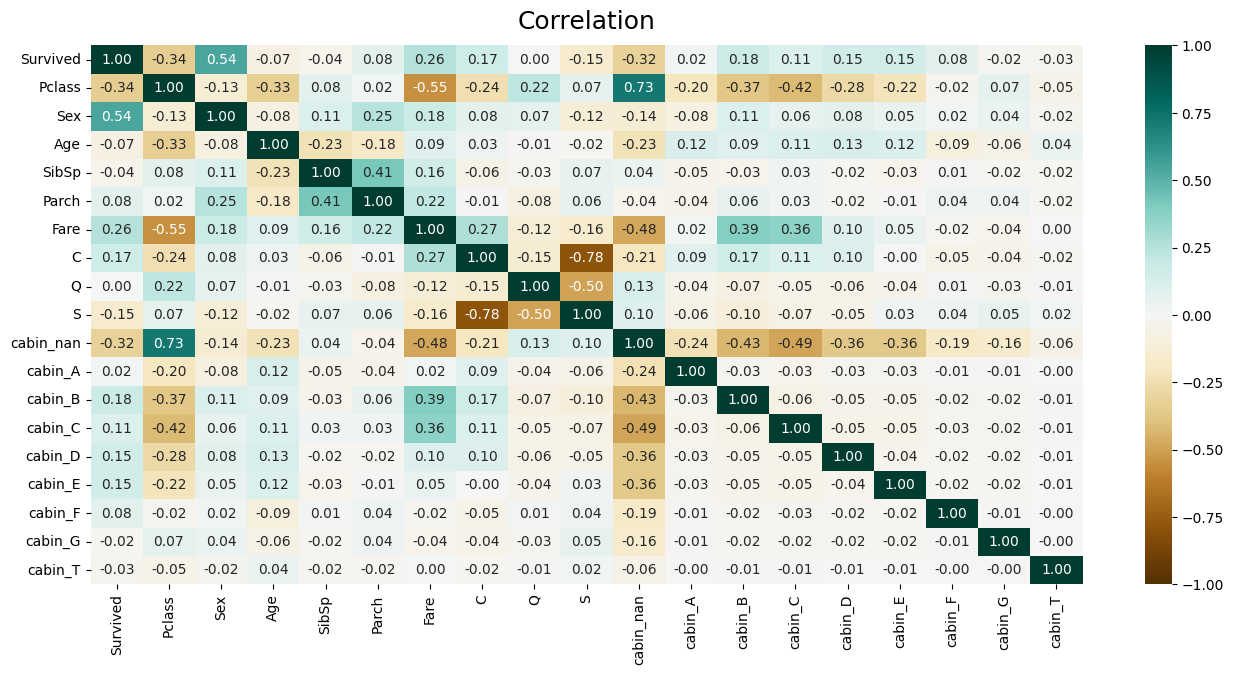

In [156]:
import seaborn as sns
correlation = a.corr()

plt.figure(figsize=(16, 7))
heatmap = sns.heatmap(correlation, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1)
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=12);

plt.show()